Tugas 1A
Edward Yosafat Sirait - 5026221091

# SCRAPPING


In [18]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

In [85]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score


import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

SCRAPPING

In [20]:
#Android App Mobile Maxim  from Google Play at
#https://play.google.com/store/apps/details?id=app.bpjs.mobile&hl=id
# https://play.google.com/store/apps/details?id=com.taxsee.taxsee
#The apps ID found in the link after id=com.taxsee.taxsee
#The apps name on Google Play titled: Mobile Maxim
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

mx_reviews = reviews_all(
    'com.taxsee.taxsee',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [21]:
#Save Mobile Maxim reviews into dataframe
df_mxrev = pd.DataFrame(np.array(mx_reviews),columns=['content'])
df_mxrev = df_mxrev.join(pd.DataFrame(df_mxrev.pop('content').tolist()))
##df_mxrev.to_csv('MaximRaw.csv', index=False)  #Save Into CSV

DATA FRAME WITH COLLECTED COLUMNS

In [22]:
#See Data Frame info
df_mxrev
df_mxrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494440 entries, 0 to 494439
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              494440 non-null  object        
 1   userName              494440 non-null  object        
 2   userImage             494440 non-null  object        
 3   content               494439 non-null  object        
 4   score                 494440 non-null  int64         
 5   thumbsUpCount         494440 non-null  int64         
 6   reviewCreatedVersion  442494 non-null  object        
 7   at                    494440 non-null  datetime64[ns]
 8   replyContent          240945 non-null  object        
 9   repliedAt             240945 non-null  datetime64[ns]
 10  appVersion            442494 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 41.5+ MB


In [23]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_mxan = df_mxrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

In [9]:
#Save Dataframe into CSV
df_mxan.to_csv("MaximReview.csv", index=False)

# PRE-PROCESSING


Membuat DF Baru berisi 50 baris utama

In [10]:
df_mxan_50 = df_mxan.sample(n=50, random_state=1)

## TOKENIZATION

In [24]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Download punkt if not already present
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'content' column
df_mxan['tokenized_content'] = df_mxan['content'].astype(str).apply(tokenize_text)

# Display the DataFrame with the new 'tokenized_content' column
df_mxan_token = df_mxan[['content', 'tokenized_content']]

df_mxan_token


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,tokenized_content
0,good job,"[good, job]"
1,top,[top]
2,mantap,[mantap]
3,"Rekomended Driver yg sangat sopan , dan SOP ny...","[Rekomended, Driver, yg, sangat, sopan, ,, dan..."
4,bagus,[bagus]
...,...,...
494435,gak bisa login..,"[gak, bisa, login, ..]"
494436,baik,[baik]
494437,Bagus,[Bagus]
494438,"Tolong loginnya diperbaiki, tidak bisa login g...","[Tolong, loginnya, diperbaiki, ,, tidak, bisa,..."


In [12]:
#Save Dataframe into CSV
df_mxan_token.to_csv("MaximReview_Token.csv", index=False)

## LOWERING CASE

In [25]:
def lower_tokenized(tokens):
    return [token.lower() for token in tokens]

df_mxan['lower_tokenized_content'] = df_mxan['tokenized_content'].apply(lower_tokenized)
df_mxan_lower = df_mxan[['tokenized_content', 'lower_tokenized_content']]
df_mxan_lower



,tokenized_content,lower_tokenized_content
0,"[good, job]","[good, job]"
1,[top],[top]
2,[mantap],[mantap]
3,"[Rekomended, Driver, yg, sangat, sopan, ,, dan...","[rekomended, driver, yg, sangat, sopan, ,, dan..."
4,[bagus],[bagus]
...,...,...
494435,"[gak, bisa, login, ..]","[gak, bisa, login, ..]"
494436,[baik],[baik]
494437,[Bagus],[bagus]
494438,"[Tolong, loginnya, diperbaiki, ,, tidak, bisa,...","[tolong, loginnya, diperbaiki, ,, tidak, bisa,..."


In [14]:
#Save Dataframe into CSV
df_mxan_lower.to_csv("MaximReview_Lowercase.csv", index=False)


## PUNCTUATION REMOVAL

In [26]:
import string

def remove_punctuation(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        cleaned_text = text.translate(translator)
        return cleaned_text
    else:
        return text


df_mxan['punc_rem_content'] = df_mxan['lower_tokenized_content'].apply(remove_punctuation)
df_mxan_punc_rem = df_mxan[['lower_tokenized_content', 'punc_rem_content']]
df_mxan_punc_rem

,lower_tokenized_content,punc_rem_content
0,"[good, job]","[good, job]"
1,[top],[top]
2,[mantap],[mantap]
3,"[rekomended, driver, yg, sangat, sopan, ,, dan...","[rekomended, driver, yg, sangat, sopan, ,, dan..."
4,[bagus],[bagus]
...,...,...
494435,"[gak, bisa, login, ..]","[gak, bisa, login, ..]"
494436,[baik],[baik]
494437,[bagus],[bagus]
494438,"[tolong, loginnya, diperbaiki, ,, tidak, bisa,...","[tolong, loginnya, diperbaiki, ,, tidak, bisa,..."


In [17]:
df_mxan_punc_rem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 62253 to 2704
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   lower_tokenized_content  50 non-null     object
 1   punc_rem_content         50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## LABELING SEDERHANA

In [28]:
df_clean = df_mxan[df_mxan['score'] != 3]
df_clean['label'] = df_clean['score'].apply(lambda x: 1 if x > 3 else 0)

/tmp/ipython-input-1647861056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['label'] = df_clean['score'].apply(lambda x: 1 if x > 3 else 0)


In [29]:
# Simpan tahap cleaning awal
df_clean.to_csv('maxim_clean_basic.csv', index=False)
print("Preprocessing tahap awal selesai.")

Preprocessing tahap awal selesai.


In [31]:
df_clean[['content', 'punc_rem_content', 'label']].head()

,content,punc_rem_content,label
0,good job,"[good, job]",1
1,top,[top],1
2,mantap,[mantap],1
3,"Rekomended Driver yg sangat sopan , dan SOP ny...","[rekomended, driver, yg, sangat, sopan, ,, dan...",1
4,bagus,[bagus],1


# STOPWORDS REMOVAL & STEMMING

In [37]:
!pip install Sastrawi
!pip install nltk

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string

from google_play_scraper import Sort, reviews_all
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [40]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
# Inisialisasi Sastrawi dan Stopwords
factory = StemmerFactory()
stemmer = factory.create_stemmer()
list_stopwords = stopwords.words('indonesian')

In [42]:
additional_stopwords = [
    'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar',
    'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si',
    'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n',
    't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', '&amp', 'yah',
    'driver', 'aplikasi', 'maxim'
]
list_stopwords.extend(additional_stopwords)

In [47]:
def preprocess_indonesian(text):
    # Cek apakah input sudah berupa List (karena error sebelumnya bilang inputnya List)
    if isinstance(text, list):
        words = text
    else:
        # Jika masih string, baru kita tokenisasi
        words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word not in list_stopwords]

    # Stemming (Opsional)
    # words = [stemmer.stem(word) for word in words]

    # Gabungkan kembali menjadi kalimat utuh (String) agar bisa masuk ke TF-IDF
    return " ".join(words)

print("Melakukan preprocessing lanjutan (Stopwords)...")

# Terapkan fungsi yang sudah diperbaiki
df_clean['final_text'] = df_clean['punc_rem_content'].apply(preprocess_indonesian)
print("Selesai.")

Melakukan preprocessing lanjutan (Stopwords)...
Selesai.


/tmp/ipython-input-3509536273.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['final_text'] = df_clean['punc_rem_content'].apply(preprocess_indonesian)


In [48]:
# Lanjutkan ke penyimpanan dan visualisasi
df_clean.to_csv('maxim_clean_final.csv', index=False)
print("File disimpan: maxim_clean_final.csv")


File disimpan: maxim_clean_final.csv


# EXPLORATORY DATA ANALYSIS (EDA)

In [52]:
# Import library Counter
from collections import Counter

In [53]:
# Pastikan kolom 'final_text' sudah terbentuk dari proses sebelumnya
all_words = ' '.join(df_clean['final_text']).split()

# Hitung frekuensi setiap kata
word_counts = Counter(all_words)

In [54]:
# Buat DataFrame untuk visualisasi (Top 20 kata)
df_word_counts = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

In [55]:
# Tampilkan tabel frekuensi
print("Top 20 Kata Terbanyak:")
print(df_word_counts)


Top 20 Kata Terbanyak:
           word   count
0             ,  116142
1         ramah   68380
2             .   57712
3         bagus   39864
4        mantap   39350
5            ..   26526
6         cepat   25573
7         kasih   21195
8          good   20961
9   terimakasih   20024
10    pelayanan   19924
11        murah   19451
12           ok   19039
13       terima   17936
14          ...   17729
15    drivernya   17588
16            !   15532
17        sopan   14424
18       banget   12176
19     membantu   11640


/tmp/ipython-input-523994207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word_counts, x='count', y='word', palette='viridis')


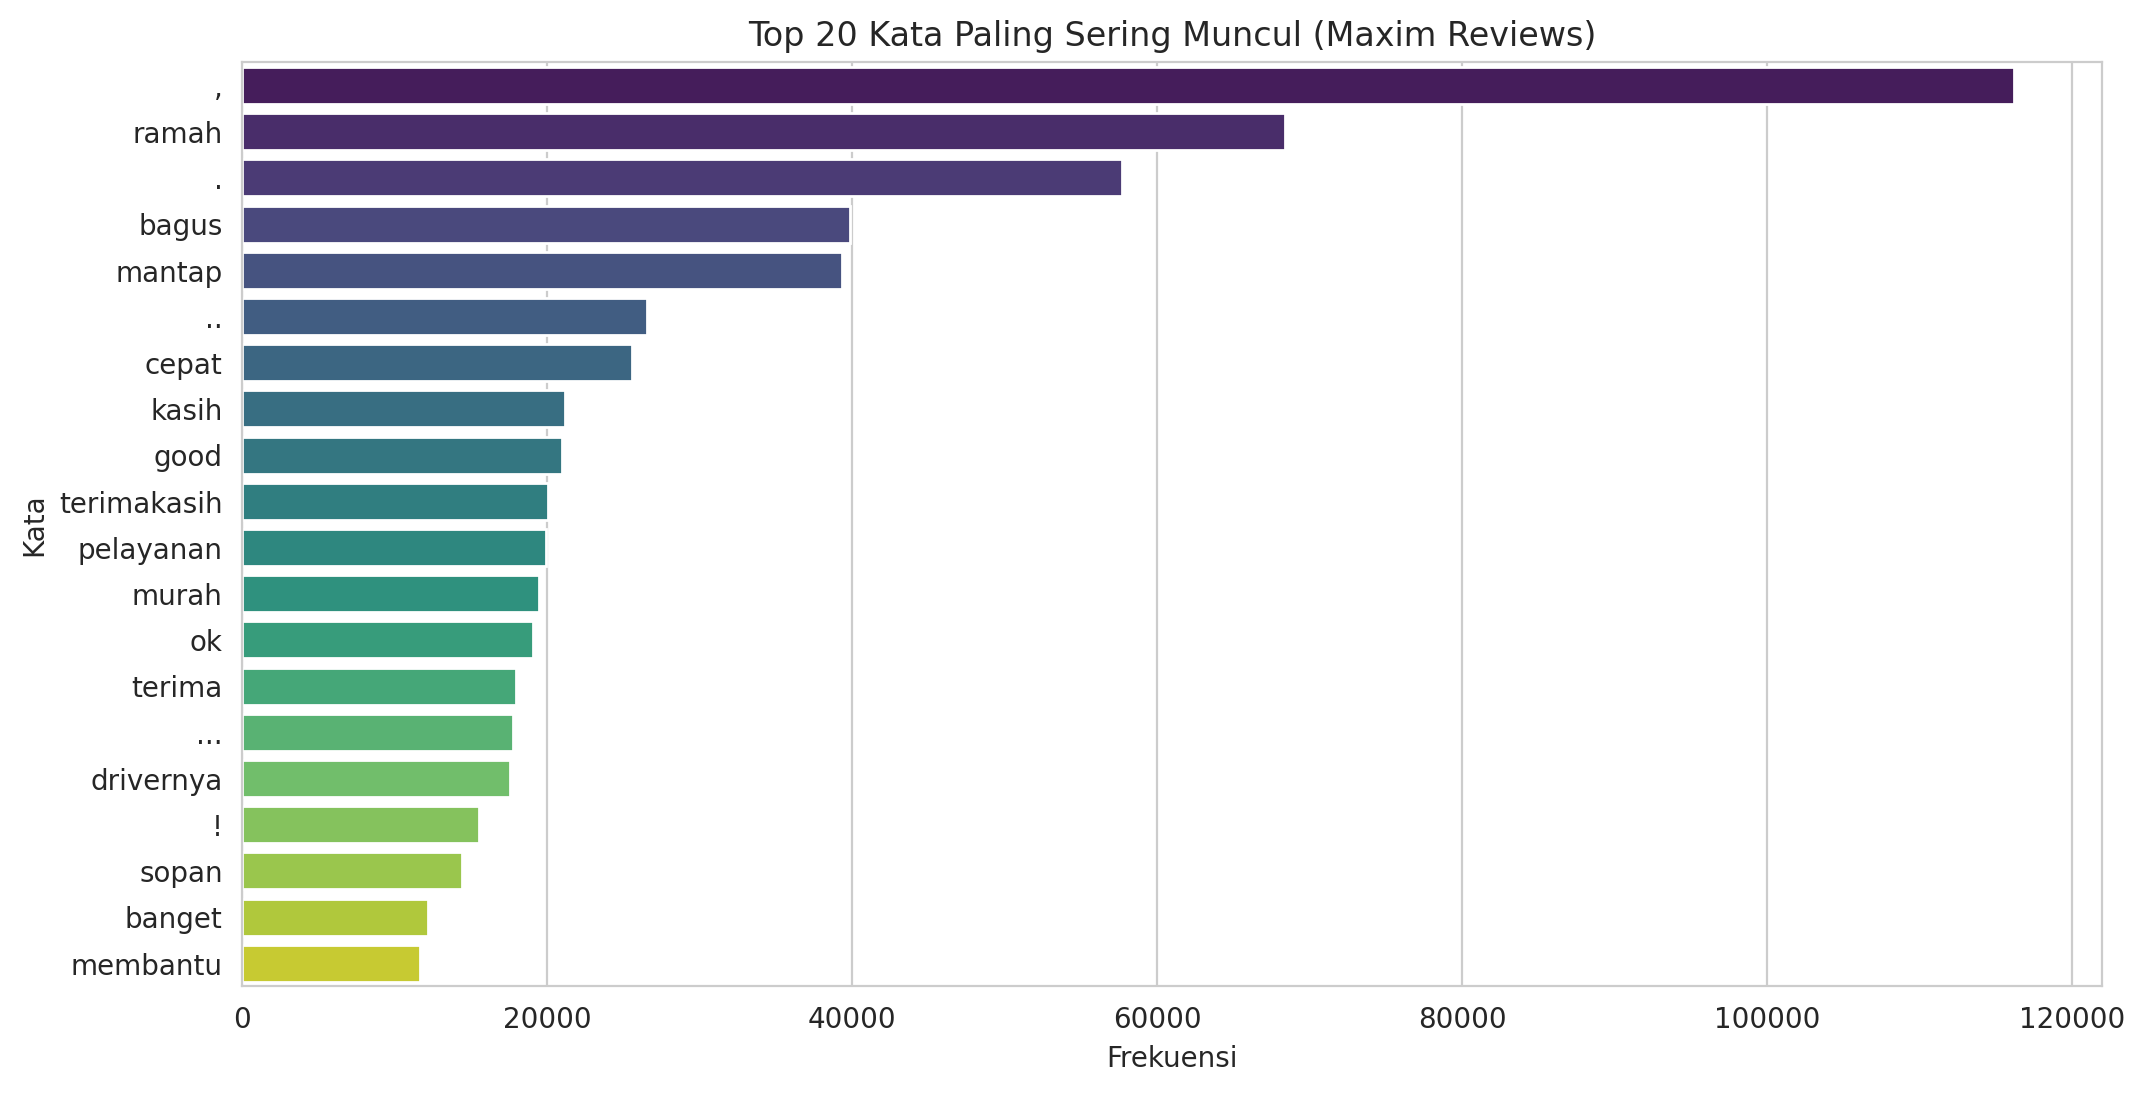

In [56]:
# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_word_counts, x='count', y='word', palette='viridis')
plt.title('Top 20 Kata Paling Sering Muncul (Maxim Reviews)')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

# FEATURE EXTRACTION (TF-IDF)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
# Menggunakan TF-IDF saja sesuai permintaan
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_clean['final_text']).toarray()
y = df_clean['label']

In [59]:
print("Fitur diekstraksi menggunakan TF-IDF.")
print(f"Shape Features (X): {X.shape}")
print(f"Shape Labels (y): {y.shape}")

Fitur diekstraksi menggunakan TF-IDF.
Shape Features (X): (480626, 1000)
Shape Labels (y): (480626,)


# SENTIMENT ANALYSIS

## TRAINING

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# 1. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# 2. Inisialisasi Model (Naive Bayes)
model = MultinomialNB()

In [64]:
# 3. Training Model
print("Sedang melatih model...")
model.fit(X_train, y_train)

Sedang melatih model...


MultinomialNB()

In [65]:
# 4. Prediksi
y_pred = model.predict(X_test)

In [66]:
# 5. Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Akurasi Model: 94.94%

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      9832
           1       0.97      0.97      0.97     86294

    accuracy                           0.95     96126
   macro avg       0.86      0.86      0.86     96126
weighted avg       0.95      0.95      0.95     96126



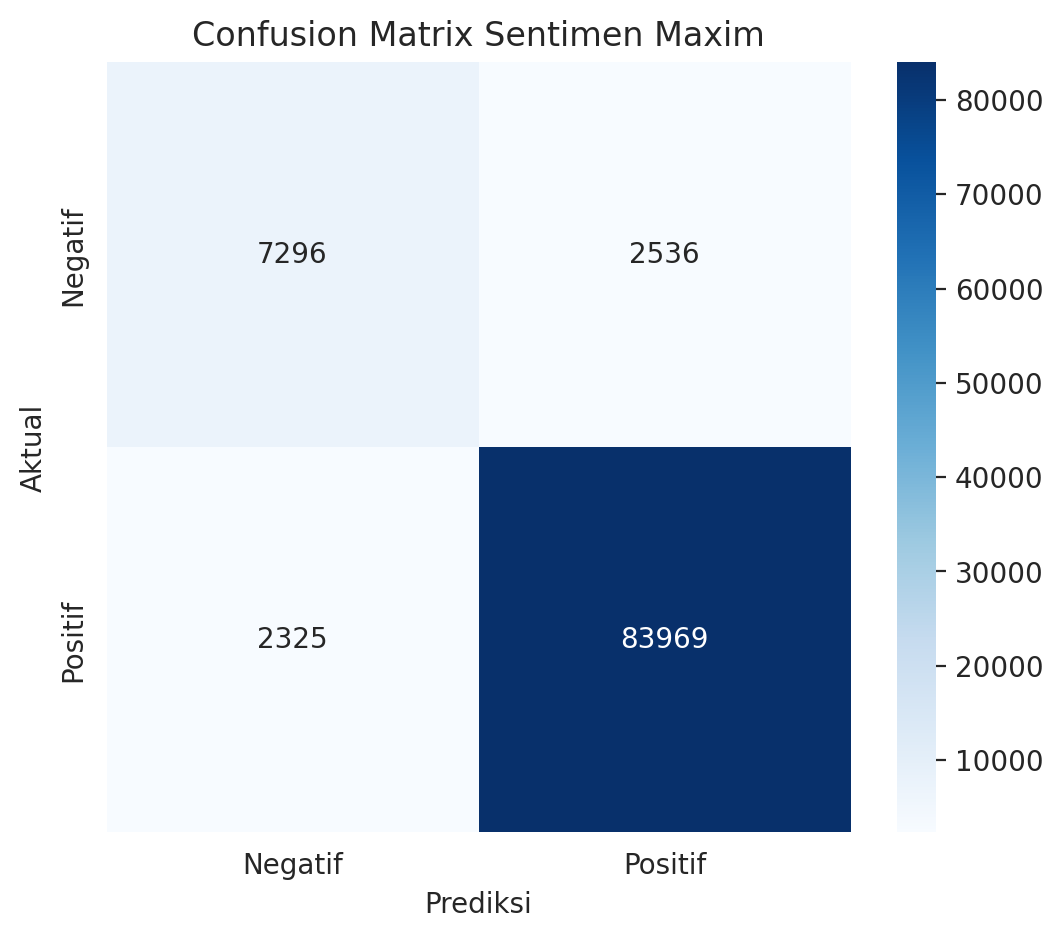

In [67]:
# 6. Confusion Matrix Visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Sentimen Maxim')
plt.show()

## TES PREDIKSI MANUAL (MAXIM)

In [79]:
def clean_text(text):
    # 1. Case folding (huruf kecil)
    text = text.lower()
    # 2. Hapus angka
    text = re.sub(r'\d+', '', text)
    # 3. Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 4. Hapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [81]:
def predict_sentiment_maxim(text):
    cleaned = clean_text(text)
    processed = preprocess_indonesian(cleaned)
    vec = vectorizer.transform([processed])
    pred = model.predict(vec)[0]
    return "Positif" if pred == 1 else "Negatif"

In [83]:
# Contoh ulasan test
test_1 = "Tarif murah banget, driver juga cepet nyampenya. Mantap maxim!"
test_2 = "Aplikasi sering error, maps ngaco parah, driver minta cancel mulu."


In [84]:
print(f"Review: '{test_1}' -> Sentimen: {predict_sentiment_maxim(test_1)}")
print(f"Review: '{test_2}' -> Sentimen: {predict_sentiment_maxim(test_2)}")

Review: 'Tarif murah banget, driver juga cepet nyampenya. Mantap maxim!' -> Sentimen: Positif
Review: 'Aplikasi sering error, maps ngaco parah, driver minta cancel mulu.' -> Sentimen: Negatif
